## SKIN LESION CLASSIFICATION WITH MACHINE LEARNING
MAIA 2021 -2023


*   BORRAS LLUIS
*   CISNEROS JUAN
*   LEON SOFIA



# In  Brief

The goal of this analysis is to train a machine learning algorightm to accurately distinguish between a Nevus, melanoma and seborrheic skin lesions from ISIC-2017 challenge Datasets.

Analyzed features: 

* a) Geometric moments (Hu moments, eccentricity, irregularity) 
* b) Texture (GLCM, LBP) 
* c) Color (Mean, Std, Skessness)

# Libraries

In [ ]:
%matplotlib inline
import os
import pandas as pd
from pandas.core.frame import DataFrame
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2
from sklearn.feature_selection import f_classif, mutual_info_classif, RFECV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.exceptions import FitFailedWarning
from sklearn.metrics import make_scorer
import warnings

# Functions


*   Dataloader
*   Model Estimator
*   Show Metrics



In [ ]:
def ML_dataloader(feature_file,target_file):
    """
    This function loads the data into a pandas format
        Parameters:
        ---------------
        feature_file    csv with the features of every image per row
        target_file     csv with the targets/labels of every image
        """
    features = pd.read_csv(feature_file, sep=',', header=0, index_col=0)
    target = pd.read_csv(target_file, sep=',', header=0, index_col=0)
    # To access the names of the images do dataFrame.index
    return features, target

def estimator_function(model_dictionary):
  """
    This function score models in a dictionary with cross validation and balance
    accuracy
      Parameters:
      ---------------
      model_dictionary  dictionary of model with name, model and parameters
  """   
  for name, model, params in model_dictionary:
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    with warnings.catch_warnings(record=False) as w:
      try:
        model_grid = GridSearchCV(model, params, n_jobs=-1)
        cv_results = cross_val_score(model_grid, x, y, cv=cv, 
                                     scoring=make_scorer(balanced_accuracy_score),
                                     n_jobs=-1)
        results.append(cv_results)
        names.append(name)
      except ValueError:
        pass    
    msg = "Cross Validation %s balanced accuracy: %f" % (name, cv_results.mean())
    print(msg)
  return cv_results


def show_metrics(y_test, y_pred):
    """
    This function shows all the metrics (f1, precision, recall, accuracy, bma)
     between the y_test and y_pred (Desire targets and prediction targets)
      Parameters:
      ----------------
      y_test         test data tragets  
      y_pred         prediction data
    """
    fpr, tpr, _ = roc_curve(y_test,  y_pred, pos_label=2)
    auc_ = auc(fpr, tpr)
    f1 = f1_score(y_test,  y_pred, average='weighted')
    prec = precision_score(y_test,  y_pred, average='weighted')
    rec = recall_score(y_test,  y_pred, average='weighted')
    acc = accuracy_score(y_test,  y_pred)
    bma = balanced_accuracy_score(y_test,  y_pred)
    print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc, " -- bma: %.2f" %bma)
    "ROC curve plot"
    plt.plot(fpr,tpr, label='ROC curve (area = %.2f)' %auc_)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.grid('-')
    plt.show()
    d = classification_report(y_test, y_pred,output_dict=True)
    display(pd.DataFrame.from_dict(d))

# Data



*   Upload data from drive cloud
*   Read csv files
*   Merge sets (Train + Validation), Data balancing and Data normalazing


In [ ]:
# Google Drive connection
drive.mount('/content/drive')

# Read the data, add panda dataframe
path_features = '/content/drive/MyDrive/SkinLesionsSegmentationClassificationMaterial/features_selection/features_train_v1.csv'
path_labels = '/content/drive/MyDrive/SkinLesionsSegmentationClassificationMaterial/features_selection/ISIC-2017_Training_Validation_GroundTruth.csv'
path_features_test = '/content/drive/MyDrive/SkinLesionsSegmentationClassificationMaterial/features_selection/features_test_v1.csv'
path_labels_test = '/content/drive/MyDrive/SkinLesionsSegmentationClassificationMaterial/features_selection/ISIC-2017_Test_v2_Part3_GroundTruth.csv'

#Data
features_test, target_test = ML_dataloader(path_features_test, path_labels_test)
features, target = ML_dataloader(path_features, path_labels)

# #Plot the scatter matrix
# pd.plotting.scatter_matrix(features[features.columns], figsize=(25,25))

# Correlation plot
# corr = features[features.columns].corr()
# f, ax = plt.subplots(figsize=(30, 30))
# sns.heatmap(corr, annot=False)

Mounted at /content/drive


In [ ]:
#Order the data merged (train  + validation sets)
data=pd.merge(features,target['label'],left_index=True,right_index=True) 
data_test=pd.merge(features_test,target_test['label'],left_index=True,right_index=True) 


# Format features and targets to numpy
x_base = data.drop('label',axis=1).to_numpy()
y = data['label'].to_numpy()

x_test_base = data_test.drop('label',axis=1).to_numpy()
y_test = data_test['label'].to_numpy()

#Scaling data
scaler = MinMaxScaler()
x = scaler.fit_transform(x_base) 
x_test = scaler.transform(x_test_base) 

x_header = list(data.drop('label',axis=1).columns.values)
# print(x_header)

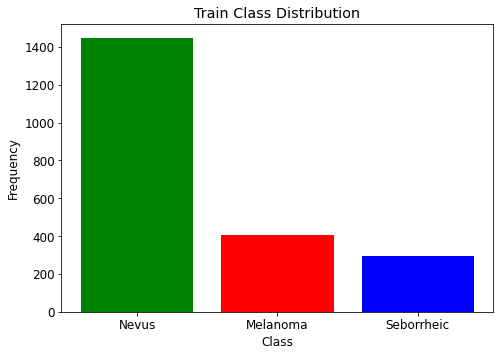

0    1450
1     404
2     296
Name: label, dtype: int64


In [ ]:
#TRAINING SET
import matplotlib

values = target['label'].value_counts()

font = {'size'   : 12}
matplotlib.rc('font', **font)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Nevus', 'Melanoma', 'Seborrheic']
values = [values[0],values[1],values[2]]
ax.bar(langs,values, color=["green", "red", "blue"])
plt.title("Train Class Distribution")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

print(target['label'].value_counts())


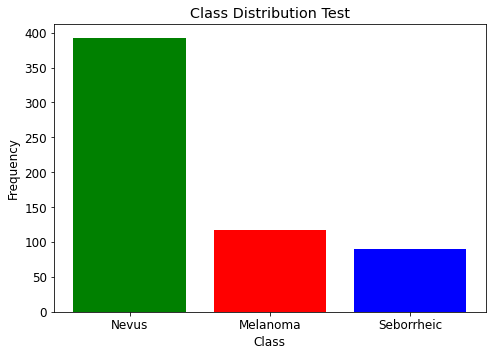

0    393
1    117
2     90
Name: label, dtype: int64

In [ ]:
# Test class distribution plotting

# Plot
values = target_test['label'].value_counts()

font = {'size'   : 12}
matplotlib.rc('font', **font)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Nevus', 'Melanoma', 'Seborrheic']
values = [values[0],values[1],values[2]]
ax.bar(langs,values, color=["green", "red", "blue"])
plt.title("Class Distribution Test")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

target_test['label'].value_counts()

# Optimization

Test all the algorithms using scikit-learns's gridsearch method for model optimization. Our models will include parametric, non-parametric and nonlinear models.

Classfier models: 
*   SVM (SVC)
*   RandomForest (RFC)
*   KNeighbors (KNN)
*   DecisionTrees (DTC)
*   ExtraTrees (ETC)
*   GradientBoosting (GBC)
*   Gaussian Naive Bayes (GNB)
*   Voting


In [ ]:
# Define parameters for optimization using dictionaries {parameter name: parameter list}

SVM_params =  {'C':np.arange(1, 1001, 100), 'gamma':['scale', 'auto'],
               'class_weight':['balanced']}
KNN_params =  {'n_neighbors':np.arange(1, 10), 'p':[2],  
               'weights':['uniform', 'distance']}
RF_params =   {'criterion': ['gini', 'entropy'],
               'n_estimators': np.arange(80, 121, 5),
               "bootstrap": [ True, False]}
DTC_params =  {'criterion':['entropy', 'gini'], 
               'max_features':[None, 'sqrt']}
ET_params =   {'criterion': ['gini', 'entropy'],
               'n_estimators': np.arange(80, 121, 10),
               'max_features': ['sqrt', 'log2']}
GB_params =   {'n_estimators': np.arange(100, 121, 5),
               'learning_rate': np.arange(0.01, 0.041, 0.02)}

In [ ]:
# Append list of models with parameter dictionaries
models_opt = []

models_opt.append(('SVM', SVC(random_state=42), SVM_params))
models_opt.append(('RFC', RandomForestClassifier(random_state=42), RF_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(random_state=42), DTC_params))
models_opt.append(('ETC', ExtraTreesClassifier(random_state=42), ET_params))
models_opt.append(('GBC', GradientBoostingClassifier(random_state=42), GB_params))

In [ ]:
# For a faster running use TPU session, confirm the number of workers availables 
print(os.cpu_count())

40


In [ ]:
# Memory preallocation
results = []
names = []
# Hide warnings
warnings.simplefilter('ignore', FitFailedWarning)
# Run the estimatior function into model dictionary
results_cv = estimator_function(models_opt)
print(results)

Cross Validation SVM balanced accuracy: 0.590759
Cross Validation RFC balanced accuracy: 0.470141
Cross Validation KNN balanced accuracy: 0.413192
Cross Validation DTC balanced accuracy: 0.453286
Cross Validation ETC balanced accuracy: 0.476644
Cross Validation GBC balanced accuracy: 0.361150
[array([0.59551444, 0.5979815 , 0.58968321, 0.56932997, 0.56063218,
       0.56283525, 0.65210728, 0.61781609, 0.59655172, 0.5651341 ]), array([0.40723297, 0.45320998, 0.46027474, 0.46363891, 0.46082375,
       0.51216475, 0.50105364, 0.49454023, 0.44971264, 0.49875479]), array([0.444351  , 0.37275021, 0.44648164, 0.44754696, 0.44597701,
       0.39319923, 0.38342912, 0.42749042, 0.4052682 , 0.36542146]), array([0.4445192 , 0.49772918, 0.45264929, 0.52071769, 0.41369732,
       0.45842912, 0.47931034, 0.40229885, 0.39568966, 0.46781609]), array([0.45657415, 0.46134006, 0.46947014, 0.45674236, 0.49042146,
       0.51072797, 0.49319923, 0.46408046, 0.46408046, 0.49980843]), array([0.36445192, 0.3287

In [ ]:
# Guassian Naive Bayes classifier does not require optimization. It will be run 
# separately without gridsearch and append the performance results to the 
# results and names lists.

GNB =  GaussianNB()
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Run cross validation
cv_results_GNB= cross_val_score(GNB,x, y, cv = cv, n_jobs=-1,
                                scoring = make_scorer(balanced_accuracy_score))
msg = "Cross Validation GuassianNB  balanced accuracy: %f" % ( cv_results_GNB.mean())
print(msg)
# Append results and names lists
results.append(cv_results_GNB)
names.append('GNB')

Cross Validation GuassianNB  balanced accuracy: 0.511675


In [ ]:
# Ensemble Voting
  
# Create lists for estimator names and objects
estimators = []
model2 = DecisionTreeClassifier()
estimators.append(("DTC", model2))
model3 = SVC()
estimators.append(("SVC", model3))
model4 = KNeighborsClassifier()
estimators.append(("KNN", model4))
model5 = RandomForestClassifier()
estimators.append(("RFC", model5))
model6 = GaussianNB()
estimators.append(("NBC", model6))
model7 = GradientBoostingClassifier()
estimators.append(("GBC", model7)) 
model8 = ExtraTreesClassifier()
estimators.append(("ETC", model8))

# Generate voting
voting = VotingClassifier(estimators,  n_jobs=-1)

# Print results
results_voting = cross_val_score(voting, x, y, cv=cv,  n_jobs=-1,
                                 scoring=make_scorer(balanced_accuracy_score))
results.append(results_voting)
names.append('Voting')
msg = "Cross Validation Voting balanced accuracy: %f" % ( results_voting.mean())
print(msg)

Cross Validation Voting balanced accuracy: 0.449312


In [ ]:
print(results)
print(names)

[array([0.59551444, 0.5979815 , 0.58968321, 0.56932997, 0.56063218,
       0.56283525, 0.65210728, 0.61781609, 0.59655172, 0.5651341 ]), array([0.40723297, 0.45320998, 0.46027474, 0.46363891, 0.46082375,
       0.51216475, 0.50105364, 0.49454023, 0.44971264, 0.49875479]), array([0.444351  , 0.37275021, 0.44648164, 0.44754696, 0.44597701,
       0.39319923, 0.38342912, 0.42749042, 0.4052682 , 0.36542146]), array([0.4445192 , 0.49772918, 0.45264929, 0.52071769, 0.41369732,
       0.45842912, 0.47931034, 0.40229885, 0.39568966, 0.46781609]), array([0.45657415, 0.46134006, 0.46947014, 0.45674236, 0.49042146,
       0.51072797, 0.49319923, 0.46408046, 0.46408046, 0.49980843]), array([0.36445192, 0.32873563, 0.36691898, 0.38884216, 0.37777778,
       0.35881226, 0.35047893, 0.375     , 0.35047893, 0.35      ]), array([0.53041772, 0.55800392, 0.5928231 , 0.53378189, 0.44022989,
       0.49109195, 0.45909962, 0.44070881, 0.52356322, 0.54703065]), array([0.41396131, 0.4312868 , 0.44984581, 0.47

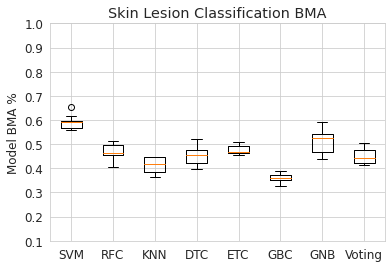

In [ ]:
# Visualize model bma for comparision

plt.boxplot(results, labels = names)
plt.title('Skin Lesion Classification BMA')
plt.ylabel('Model BMA %')
sns.set_style("whitegrid")
plt.ylim(0.1,1)
plt.grid('-')
plt.show()

We can see the performance of all the selected classifier algorithms and the one with the best results is SVM classifier, in second place Gaussian Naives Bayes and in third a tie between Random Forest and ExtraTrees.

# First Test

Fit the best model (RFC classifier) without any change in their hyperparameters.

Test its performance with the test set.

In [ ]:

# Instantiate a new SVC model
SVC_model = SVC(random_state=42)

# Fit SVC model to the entire training data
fit = SVC_model.fit(x, y)

# Test SVC model on test data
SVC_predicted = SVC_model.predict(x_test)
print('SVC analyis Balanced Accuracy is: {}'.format(balanced_accuracy_score(y_test, SVC_predicted )))

RFC analyis Balanced Accuracy is: 0.3398860398860399


In [ ]:
cm_SVC = pd.DataFrame(confusion_matrix(y_test, SVC_predicted), 
                      index = ['Nevus','Melanoma','Seborrheic'], 
                      columns = ['P_Nevus','P_Melanoma','P_Seborrheic'] )

print('SVC Model Confusion Matrix')
cm_SVC

SVC Model Confusion Matrix


,P_Nevus,P_Melanoma,P_Seborrheic
Nevus,393,0,0
Melanoma,114,1,2
Seborrheic,89,0,1


F1: 0.53  -- prec: 0.68  -- recall: 0.66  -- acc: 0.66  -- bma: 0.34


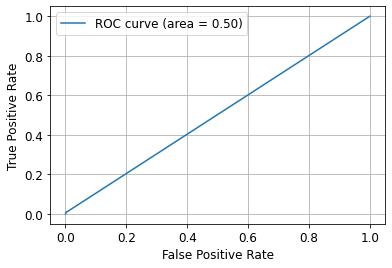

,0,1,2,accuracy,macro avg,weighted avg
precision,0.659396,1.000000,0.333333,0.658333,0.664243,0.676904
recall,1.000000,0.008547,0.011111,0.658333,0.339886,0.658333
f1-score,0.794742,0.016949,0.021505,0.658333,0.277732,0.527087
support,393.000000,117.000000,90.000000,0.658333,600.000000,600.000000


Balanced accuracy of 33.99%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


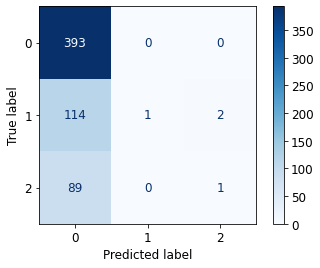

In [ ]:
show_metrics(y_test, SVC_predicted)
BMA = balanced_accuracy_score(y_test, SVC_predicted)
print("Balanced accuracy of %0.2f%%" % (BMA * 100))
plot_confusion_matrix(fit, x_test, y_test, cmap = plt.cm.Blues)

#Tune Model Hyperparameters

Find the best parameters for the selected classifier. For this model we wil use Random Forest.

In [ ]:
# Stratified 10-fold cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
SVC_pipe = (
            Pipeline([('classifier', SVC(random_state=42))]),
            {'classifier__C': (100, 1000,  50),              
             'classifier__gamma':['scale', 'auto'],
             'classifier__class_weight':['balanced']}
        )

pipe, parameters = SVC_pipe
print ("Pipeline: \n", pipe)
print ("Parameters: \n", parameters)
# Hide warnings
warnings.simplefilter('ignore', FitFailedWarning)
with warnings.catch_warnings(record=False) as w:
  try:      
    grid_search = GridSearchCV(pipe, parameters, cv=cv, n_jobs=-1)
    # Train model
    grid_search.fit(x, y)
  except ValueError:
          pass
# Here we just print the best accuracy and the corresponding values for the parameters
print("The best parameters are %s with an accuracy of %0.4f in model SVC" % (grid_search.best_params_, grid_search.best_score_))

Pipeline: 
 Pipeline(steps=[('classifier', SVC())])
Parameters: 
 {'classifier__C': (100, 1000, 50), 'classifier__gamma': ['scale', 'auto'], 'classifier__class_weight': ['balanced']}
The best parameters are {'classifier__C': 1000, 'classifier__class_weight': 'balanced', 'classifier__gamma': 'scale'} with an accuracy of 0.6400 in model SVC


# Second Test
Test the performance of the hyperparameters tuning.

In [ ]:
# Instantiate a new RFC model
SVC_model = SVC(C=1000, gamma='scale', class_weight='balanced', random_state=42)

# Fit SVC model to the entire training data
fit = SVC_model.fit(x, y)

# Test SVC model on test data
SVC_predicted = SVC_model.predict(x_test)
print('SVC analyis Balanced Accuracy is: {}'.format(balanced_accuracy_score(y_test, SVC_predicted )))

SVC analyis Balanced Accuracy is: 0.5946847610969749


In [ ]:
cm_SVC = pd.DataFrame(confusion_matrix(y_test, SVC_predicted), 
                      index = ['Nevus','Melanoma','Seborrheic'], 
                      columns = ['P_Nevus','P_Melanoma','P_Seborrheic'] )

print('SVC Model Confusion Matrix')
cm_SVC

SVC Model Confusion Matrix


,P_Nevus,P_Melanoma,P_Seborrheic
Nevus,247,77,69
Melanoma,36,52,29
Seborrheic,12,14,64


F1: 0.62  -- prec: 0.68  -- recall: 0.60  -- acc: 0.60  -- bma: 0.59


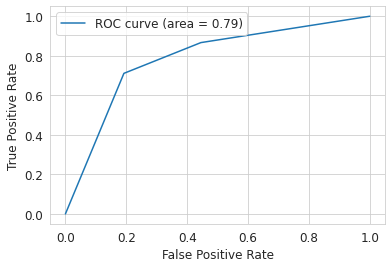

,0,1,2,accuracy,macro avg,weighted avg
precision,0.837288,0.363636,0.395062,0.605,0.531995,0.678592
recall,0.628499,0.444444,0.711111,0.605,0.594685,0.605000
f1-score,0.718023,0.400000,0.507937,0.605,0.541987,0.624496
support,393.000000,117.000000,90.000000,0.605,600.000000,600.000000


Balanced accuracy of 59.47%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


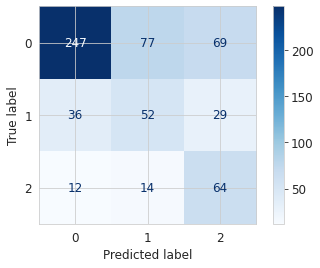

In [ ]:
show_metrics(y_test, SVC_predicted)
BMA = balanced_accuracy_score(y_test, SVC_predicted)
print("Balanced accuracy of %0.2f%%" % (BMA * 100))
plot_confusion_matrix(fit, x_test, y_test, cmap = plt.cm.Blues)

# Dimensionality reduction + Feature selection
Apply PCA for dimensionality reduction and for feature reduction we use SelectKbest wth chi2 approach.

In [ ]:
#In clf you write down your classifier previously selected before
clf = SVC_model

ax_test_acc=0
feat_selected=0
pca_components=0
max_test_acc = 0

for ind_sel in range(1,x.shape[1]): #Check all the features 
  
  for ind_pca in range(1,ind_sel-1): #The number of components is, at most, equal to the number of features minus 1
    #A pipeline can be created adding an element to be used in feature engineering or classifiation with fixed or variable parameters 
    pipe = Pipeline([('feat_select', SelectKBest(chi2,k=ind_sel)), 
                     ('reduce_dim', PCA(n_components=ind_pca)), 
                     ('classifier', clf)])
    
    #With a pipeline we can fit the training set and then predict the test set
    pipe.fit(x,y)
    scores = pipe.predict(x_test)
    
    #Evaluate the performance and find the maximum with corresponding indexes
    current_acc = balanced_accuracy_score(y_test, scores)
    if current_acc>max_test_acc:
      max_test_acc = current_acc
      feat_selected = ind_sel
      pca_components = ind_pca
      print("\nMaximum prediction balanced accuracy equal to {0:.2%} corresponding to {1} selected features and {2} components".format(max_test_acc,feat_selected,pca_components))

print("\nMaximum prediction balanced accuracy equal to {0:.2%} corresponding to {1} selected features and {2} components".format(max_test_acc,feat_selected,pca_components))


Maximum prediction balanced accuracy equal to 44.84% corresponding to 3 selected features and 1 components

Maximum prediction balanced accuracy equal to 45.04% corresponding to 4 selected features and 1 components

Maximum prediction balanced accuracy equal to 46.10% corresponding to 4 selected features and 2 components

Maximum prediction balanced accuracy equal to 47.50% corresponding to 5 selected features and 2 components

Maximum prediction balanced accuracy equal to 48.07% corresponding to 7 selected features and 4 components

Maximum prediction balanced accuracy equal to 49.20% corresponding to 7 selected features and 5 components

Maximum prediction balanced accuracy equal to 49.43% corresponding to 9 selected features and 4 components

Maximum prediction balanced accuracy equal to 52.40% corresponding to 9 selected features and 6 components

Maximum prediction balanced accuracy equal to 53.73% corresponding to 9 selected features and 7 components

Maximum prediction balanced

In [ ]:
select=SelectKBest(chi2, k=feat_selected)
x_best=select.fit_transform(x,y)
selected_ft =select.get_feature_names_out(features.keys())

print("Selected features:\n"+str(selected_ft))
pca=PCA(n_components=pca_components)
pca.fit(x_best)
print(sum(pca.explained_variance_ratio_))

Selected features:
['glcm_contrast_1' 'glcm_contrast_2' 'glcm_dissimilarity_1'
 'glcm_dissimilarity_2' 'lbp_81_ror_2' 'lbp_81_ror_3' 'lbp_81_ror_4'
 'lbp_81_ror_5' 'lbp_81_ror_13' 'lbp_81_ror_14' 'lbp_81_ror_16'
 'lbp_81_ror_17' 'lbp_81_ror_19' 'lbp_81_ror_28' 'lbp_81_ror_34'
 'lbp_81_ror_35' 'lbp_82_ror_2' 'lbp_82_ror_3' 'lbp_82_ror_5'
 'lbp_82_ror_7' 'lbp_82_ror_8' 'lbp_82_ror_10' 'lbp_82_ror_11'
 'lbp_82_ror_12' 'lbp_82_ror_13' 'lbp_82_ror_14' 'lbp_82_ror_15'
 'lbp_82_ror_16' 'lbp_82_ror_17' 'lbp_82_ror_19' 'lbp_82_ror_20'
 'lbp_82_ror_22' 'lbp_82_ror_24' 'lbp_82_ror_25' 'lbp_82_ror_26'
 'lbp_82_ror_27' 'lbp_82_ror_28' 'lbp_82_ror_30' 'lbp_82_ror_31'
 'lbp_82_ror_34' 'lbp_82_ror_35' 'lbp_162_uni_3' 'lbp_162_uni_4'
 'lbp_162_uni_5' 'lbp_162_uni_6' 'lbp_162_uni_7' 'lbp_162_uni_10'
 'lbp_162_uni_11' 'lbp_162_uni_12' 'lbp_162_uni_13' 'lbp_162_uni_14'
 'lbp_162_uni_15' 'lbp_162_uni_16' 'lbp_162_uni_18' 'mean_color_g'
 'mean_color_b']
0.9995616367581426


# Third Test

Test the performance of the Dimensionality reduction and feature selection with the selected tuning classifier model.

In [ ]:
data2 = pd.DataFrame(x)
data2.set_axis(x_header, axis=1, inplace=True)
data2_test = pd.DataFrame(x_test)
data2_test.set_axis(x_header, axis=1, inplace=True)
Y_data2 = pd.DataFrame(y)
Y_data2.set_axis(['label'], axis=1,inplace=True)
Y_data2_test = pd.DataFrame(y_test)
Y_data2_test.set_axis(['label'], axis=1,inplace=True)

#Take only the selected features
data2 = data2[selected_ft]
data2_test = data2_test[selected_ft]
#Order the data merged (train  + validation sets)
x_reduced = pd.merge(data2, Y_data2, left_index=True,right_index=True) 
x_reduced = x_reduced.drop('label',axis=1).to_numpy()

x_reduced_test = pd.merge(data2_test, Y_data2_test, left_index=True,right_index=True)
x_reduced_test = x_reduced_test.drop('label',axis=1).to_numpy()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1: 0.67  -- prec: 0.71  -- recall: 0.65  -- acc: 0.65  -- bma: 0.65


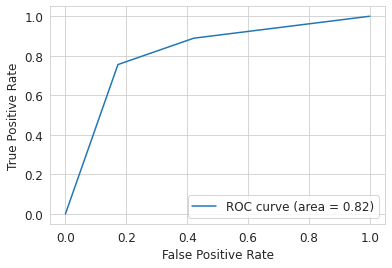

,0,1,2,accuracy,macro avg,weighted avg
precision,0.852459,0.446043,0.435897,0.65,0.578133,0.710724
recall,0.661578,0.529915,0.755556,0.65,0.649016,0.650000
f1-score,0.744986,0.484375,0.552846,0.65,0.594069,0.665346
support,393.000000,117.000000,90.000000,0.65,600.000000,600.000000


Balanced accuracy of 64.90%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


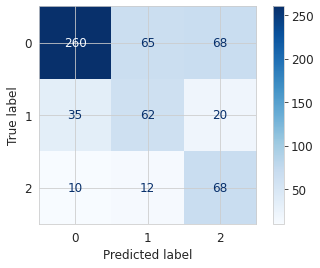

In [ ]:
pipe = Pipeline([('feat_select', SelectKBest(chi2, k=feat_selected)),
                 ('reduce_dim', PCA(n_components=pca_components)),
                 ('classifier', clf)])

fit = pipe.fit(x_reduced, Y_data2)
ypred = pipe.predict(x_reduced_test)
show_metrics(y_test, ypred)
BMA = balanced_accuracy_score(y_test, ypred)
print("Balanced accuracy of %0.2f%%" % (BMA * 100))
plot_confusion_matrix(fit, x_reduced_test, y_test, cmap = plt.cm.Blues)

In [ ]:
cm_SVC = pd.DataFrame(confusion_matrix(y_test, ypred), 
                      index = ['Nevus','Melanoma','Seborrheic'], 
                      columns = ['P_Nevus','P_Melanoma','P_Seborrheic'] )

print('SVC Model Confusion Matrix')
cm_SVC

SVC Model Confusion Matrix


,P_Nevus,P_Melanoma,P_Seborrheic
Nevus,260,65,68
Melanoma,35,62,20
Seborrheic,10,12,68


In [ ]:
# while True : pass

#Second Tune
After the reduction of both, dimensionality and features, we tuned again the classifier in order to achieve de best result.

In [ ]:
SVC_pipe = (
            Pipeline([('classifier', SVC(random_state=42))]),
            {'classifier__C': (100, 1000,  50),              
             'classifier__gamma':['scale', 'auto'],
             'classifier__class_weight':['balanced']}
        )

pipe, parameters = SVC_pipe
print ("Pipeline: \n", pipe)
print ("Parameters: \n", parameters)

# Hide warnings
warnings.simplefilter('ignore', FitFailedWarning)
with warnings.catch_warnings(record=False) as w:
  try:    
      grid_search = GridSearchCV(pipe, parameters, cv=cv, n_jobs=-1)
      # Train model
      grid_search.fit(x_best, y)
  except ValueError:
          pass
# Here we just print the best accuracy and the corresponding values for the parameters
print("The best parameters are %s with an accuracy of %0.4f in model SVC" % (grid_search.best_params_, grid_search.best_score_))

Pipeline: 
 Pipeline(steps=[('classifier', SVC(random_state=42))])
Parameters: 
 {'classifier__C': (100, 1000, 50), 'classifier__gamma': ['scale', 'auto'], 'classifier__class_weight': ['balanced']}
The best parameters are {'classifier__C': 1000, 'classifier__class_weight': 'balanced', 'classifier__gamma': 'scale'} with an accuracy of 0.6535 in model SVC


# Fourth Test

Fit the best model (SVM classifier) with all the changes in their hyperparameters, dimensionality and number of features.

Test its performance in the test set.

In [ ]:
# Instantiate a new SVC model
SVC_model = SVC(C=1000, class_weight='balanced', gamma='scale', random_state=42)

# Fit SVC model to the entire training data
fit = SVC_model.fit(x_reduced, Y_data2)

#Fit test features into the model with only the selected features

# Test SVC model on test data
SVC_predicted = SVC_model.predict(x_reduced_test)
print('SVC analyis Balanced Accuracy is: {}'.format(balanced_accuracy_score(y_test, SVC_predicted )))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC analyis Balanced Accuracy is: 0.6182531915356343


In [ ]:
cm_SVC = pd.DataFrame(confusion_matrix(y_test, SVC_predicted), 
                      index = ['Nevus','Melanoma','Seborrheic'], 
                      columns = ['P_Nevus','P_Melanoma','P_Seborrheic'] )

print('SVC Model Confusion Matrix')
cm_SVC

SVC Model Confusion Matrix


,P_Nevus,P_Melanoma,P_Seborrheic
Nevus,259,76,58
Melanoma,37,58,22
Seborrheic,14,13,63


F1: 0.65  -- prec: 0.69  -- recall: 0.63  -- acc: 0.63  -- bma: 0.62


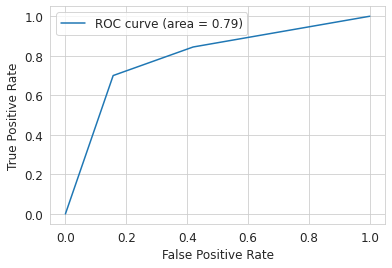

,0,1,2,accuracy,macro avg,weighted avg
precision,0.835484,0.394558,0.440559,0.633333,0.556867,0.690265
recall,0.659033,0.495726,0.700000,0.633333,0.618253,0.633333
f1-score,0.736842,0.439394,0.540773,0.633333,0.572336,0.649429
support,393.000000,117.000000,90.000000,0.633333,600.000000,600.000000


Balanced accuracy of 61.83%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


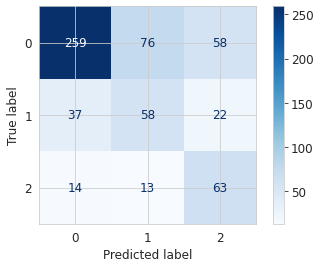

In [ ]:
show_metrics(y_test, SVC_predicted)
BMA = balanced_accuracy_score(y_test, SVC_predicted)
print("Balanced accuracy of %0.2f%%" % (BMA * 100))
plot_confusion_matrix(fit, x_reduced_test, y_test, cmap = plt.cm.Blues)